# Empirical Distribution Predictors

We may be losing a lot of information in the annotations by condensing them into a single number. Instead, we can train a model to predict the empirical distribution formed by the annotations over the answer choices. We do this by minimizing the cross-entropy between the predicted distributions and the empirical distributions. This is essentially softmax classification, but off-the-shelf implementations don't let you pass a distribution as a training label, so we have to roll our own in TensorFlow.

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from ngram import *
from baselines import *
from error_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
d = tidy_labels(pd.concat(load_cf_data()))
d = d.dropna(subset=['recipient'])
d = d.iloc[np.random.permutation(np.arange(d.shape[0]))]

In [3]:
max_features = 5000
architecture = [50, 20]

In [4]:
ngram_feature_pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (1,5), analyzer = 'char', max_features = max_features)),
    ('tfidf', TfidfTransformer(sublinear_tf=True,norm='l2')),
])

In [5]:
training_epochs = 75
batch_size = 500
display_step = 500

# Get CharGrams

In [6]:
labels = empirical_dist(d['recipient'], w = 0.25)
data = get_labeled_comments(d, labels)
train, test = train_test_split(data, test_size = 0.2, random_state=0)

y_train =train.ix[:, train.columns != 'x'].values
y_test =test.ix[:, train.columns != 'x'].values

ngram_feature_extractor = ngram_feature_pipeline.fit(train['x'])
X_train = ngram_feature_extractor.transform(train['x'])
X_test = ngram_feature_extractor.transform(test['x'])

Fit a softmax regression to the empirical distribtion of annotions over answer choices.

Batch: 0001 cost= 74.696441650

	Train Micro ROC: 0.881359097783
	Test Micro ROC: 0.884683555052

	Train Micro F1: 0.00587823652904
	Test Micro F1: 0.00347624565469

	Train Macro F1: 0.00587823652904
	Test Macro F1: 0.00347624565469

	Train Pearson Correlation:  0.00594942498909
	Test Pearson Correlation:  0.0020517477674

	Train Spearman Correlation:  0.0101032874177
	Test Spearman Correlation:  0.0250425465957

	Train RMSE:  0.3165117212715865
	Test RMSE:  0.31262976634133993

	Train R^2:  -62.2051576344
	Test R^2:  -77.0402027021


Batch: 0501 cost= 35.763429839

	Train Micro ROC: 0.916936752178
	Test Micro ROC: 0.914207962345

	Train Micro F1: 0.375516065338
	Test Micro F1: 0.345969819654

	Train Macro F1: 0.375516065338
	Test Macro F1: 0.345969819654

	Train Pearson Correlation:  0.377826871027
	Test Pearson Correlation:  0.347782060021

	Train Spearman Correlation:  0.231384918072
	Test Spearman Correlation:  0.219537478277

	Train RMSE:  0.24505714382277655
	Test RMSE:  0.248370

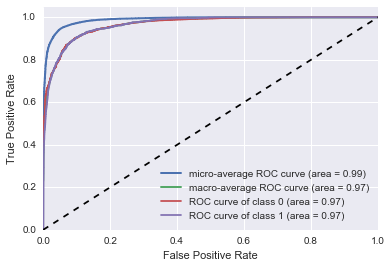

In [10]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step, 
        architecture = architecture)

Fit a softmax regression to the most common annotation. 

Batch: 0001 cost= 81.594108582

	Train Micro ROC: 0.274147532087
	Test Micro ROC: 0.271192155653

	Train Micro F1: 0.236314467839
	Test Micro F1: 0.230355891286

	Train Macro F1: 0.236314467839
	Test Macro F1: 0.230355891286

	Train Pearson Correlation:  0.108552153349
	Test Pearson Correlation:  0.0979862593541

	Train Spearman Correlation:  0.0913750287949
	Test Spearman Correlation:  0.0787632150812

	Train RMSE:  0.7243646519848093
	Test RMSE:  0.7257503539991964

	Train R^2:  -2.12809243921
	Test R^2:  -2.12079378925


Batch: 0501 cost= 41.324830022

	Train Micro ROC: 0.94459882845
	Test Micro ROC: 0.944057714199

	Train Micro F1: 0.49473761684
	Test Micro F1: 0.481089258699

	Train Macro F1: 0.49473761684
	Test Macro F1: 0.481089258699

	Train Pearson Correlation:  0.504154153393
	Test Pearson Correlation:  0.482618119706

	Train Spearman Correlation:  0.382002525465
	Test Spearman Correlation:  0.369447378483

	Train RMSE:  0.27629711536518925
	Test RMSE:  0.28002053344755723

	

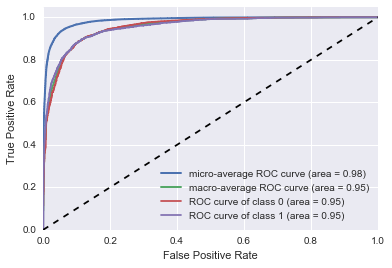

In [11]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture,
        one_hot = True)

Conclusion: Spearman is 5 points higher in EDP model, Pearson and ROC are about the same. Spearman seems more appropriate than pearson (see link):

https://stats.stackexchange.com/questions/11746/what-could-cause-big-differences-in-correlation-coefficient-between-pearsons-an

# Blocked on blocked

In [12]:
d_b = tidy_labels(load_cf_data()[0])
d_b = d_b.dropna(subset=['recipient'])

labels_b = empirical_dist(d_b['recipient'], w = 0.25)
data_b = get_labeled_comments(d_b, labels_b)
train_b, test_b = train_test_split(data_b, test_size = 0.2, random_state=0)

y_train_b =train_b.ix[:, train_b.columns != 'x'].values
y_test_b =test_b.ix[:, train_b.columns != 'x'].values

ngram_feature_extractor_b = ngram_feature_pipeline.fit(train_b['x'])
X_train_b = ngram_feature_extractor_b.transform(train_b['x'])
X_test_b = ngram_feature_extractor_b.transform(test_b['x'])

Batch: 0001 cost= 66.039299011

	Train Micro ROC: 0.756431653216
	Test Micro ROC: 0.751503009963

	Train Micro F1: 0.142490198729
	Test Micro F1: 0.143238909674

	Train Macro F1: 0.142490198729
	Test Macro F1: 0.143238909674

	Train Pearson Correlation:  -0.053129149
	Test Pearson Correlation:  -0.0590610448459

	Train Spearman Correlation:  -0.0570274078277
	Test Spearman Correlation:  -0.0560343427467

	Train RMSE:  0.45946310984357364
	Test RMSE:  0.4629817523093717

	Train R^2:  -0.653061982591
	Test R^2:  -0.686613323673


Batch: 0501 cost= 35.004552814

	Train Micro ROC: 0.886794819825
	Test Micro ROC: 0.880277185255

	Train Micro F1: 0.379452631579
	Test Micro F1: 0.379614505064

	Train Macro F1: 0.379452631579
	Test Macro F1: 0.379614505064

	Train Pearson Correlation:  0.371112318007
	Test Pearson Correlation:  0.363826117754

	Train Spearman Correlation:  0.270055806688
	Test Spearman Correlation:  0.269583603245

	Train RMSE:  0.26622716381421374
	Test RMSE:  0.2708790122488

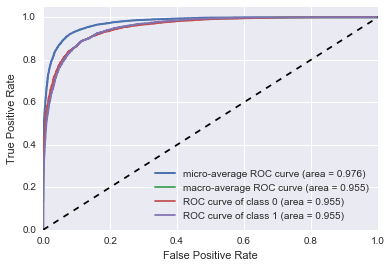

In [13]:
NN_CLF(X_train_b,
        y_train_b,
        X_test_b,
        y_test_b,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step, 
        architecture = architecture)